# Input energy

Calculation of energy dissipation is done by first evaluating the external power
\begin{align}
 W = \int_0^t F \dot{u} \, \mathrm{d}t
\end{align}
This energy represents the work supplied by the testing machine and the energy
recovered during unloading.
**Remark**: Kinetic energy due to dynamic effect is not considered here.

Considering cyclic loading, let us introduce a notion of maximum total displacement 
achieved within the history up to the time $t$ as
\begin{align}
  \tilde{u}(t) = \max_{\theta \in (0,t)} u(\theta)
\end{align}

The first question analyzed here is how to distinguish elastic recoverable displacement from the inelastic one.
\begin{align}
 u^\mathrm{el}(t) = \tilde{u}(t) - u(t) 
\end{align}
and, its rate
\begin{align}
 \dot{u}^\mathrm{el}(t) = \tilde{u}(t) - \dot{u}(t)
\end{align}

The energy recovery since the last $\tilde{u}(t)$
\begin{align}
 U(t) \int_t^{t+\theta} F \dot{u} \, \mathrm{d}t
\end{align}

Considering a periodic loading with
\begin{align}
 F(t) = F_\mathrm{m} + F_\mathrm{a} \sin(t)
\end{align}

In [1]:
%matplotlib widget
import sympy as sp
import numpy as np
import matplotlib.pylab as plt
sp.init_printing()

# Periodic loading

Cyclic loading function is introduced as
\begin{align}
 F_\mathrm{cyc}(t) = \bar{F} + \Delta F 
 \sin \frac{t}{T}
\end{align}
with the mean value
\begin{align}
 \bar{F} = \frac{F_\mathrm{up} + F_\mathrm{lo}}{2}
\end{align}
and amplitude
\begin{align}
 \Delta {F} = \frac{F_\mathrm{up} - F_\mathrm{lo}}{2}
\end{align}
and the period $T = \frac{1}{2 \pi}$

In [2]:
T = 1 / 2 / sp.pi

In [3]:
t = sp.symbols(r't')
F_up, F_lo = sp.symbols(r'F_up, F_lo')

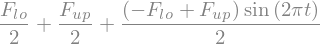

In [4]:
F_t_cyc = sp.simplify((F_up+F_lo)/2 + (F_up-F_lo)/2 * sp.sin(t/T))
sp.simplify(F_t_cyc)

To consider the initial loading branch up to the level $\bar{F}$. It is 
assumed linear with the slope equal to the derivative of $F_\mathrm{cyc}$ at the level $\bar{F}$.

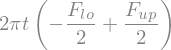

In [5]:
F_t_lin = F_t_cyc.diff(t).subs(t,0) * t
F_t_lin

The equation resolving the transition between the linear and cyclic branch then reads
\begin{align}
\bar{F} =  \frac{\Delta F}{T} t
\end{align}

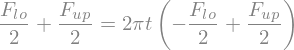

In [6]:
Eq_T_0 = sp.Eq((F_up+F_lo)/2, F_t_lin)
Eq_T_0

rendering
\begin{align}
T_0 = \frac{ \bar{F} }{\Delta F} T
\end{align}

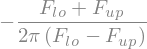

In [7]:
T_0 = sp.solve(Eq_T_0,t)[0]
T_0

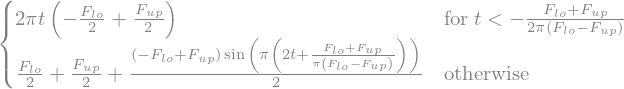

In [8]:
F_t = sp.Piecewise(
    (F_t_lin, t < T_0),
    (F_t_cyc.subs(t, t-T_0), True)
)
F_t

In [9]:
get_F_t = sp.lambdify((t, F_up, F_lo), F_t)
get_T_0 = sp.lambdify((F_up, F_lo), T_0)

In [10]:
_, ax = plt.subplots(1,1)
t_range = np.linspace(0,10,1000)
T_0_ = get_T_0(3,0.5)
ax.plot([T_0_], get_F_t(T_0_,3,0.5), marker='o')
ax.plot(t_range, get_F_t(t_range,3,0.5));

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Oscilating total displacement

The periodic function for displacement corresponding to the load
is required to grow linearly up to the point 
\begin{align}
T_1 = T_0 + \frac{1}{4} + \phi
\end{align}
where $\phi$ represents a phase shift. This parameter can be used
to introduce the hysteretic loops.

To represent the fatigue creep evolution, let us introduce two general functions
capturing the fatigue creep curve at the upper and lower load $u_\mathrm{up}$ and 
$u_\mathrm{lo}(t)$, respectively. To introduce a simple running example, these 
functions are assumed linear
\begin{align}
 u_\mathrm{up}(t) &= U_\mathrm{up,0} - \frac{U_\mathrm{up,1}-U_\mathrm{up,0}}{N} \cdot t \\
 u_\mathrm{lo}(t) &= U_\mathrm{lo,0} - \frac{U_\mathrm{lo,1}-U_\mathrm{lo,0}}{N} \cdot t
\end{align}
where $N$ represents the number of cycles

In [11]:
U_up0, U_up1 = sp.symbols(r'U_up0, U_up1', positive=True)
U_lo0, U_lo1 = sp.symbols(r'U_lo0, U_lo1', positive=True)
phi = sp.symbols(r'phi', positive=True)
N = sp.symbols(r'N', positive=True)

In [12]:
U_up_t = U_up0 + (U_up1 - U_up0)/N * t
U_lo_t = U_lo0 + (U_lo1 - U_lo0)/N * t

In [13]:
U_up, U_lo = sp.symbols(r'U_up, U_lo')

The cyclic branch of the displacements can be defined as
\begin{align}
u_\mathrm{cyc}(t) = u_\mathrm{up}(t) + 
\left(u_\mathrm{up}(t) - u_\mathrm{lo}(t) \right) \, \frac{\cos \frac{t}{T} - 1}{2}
\end{align}

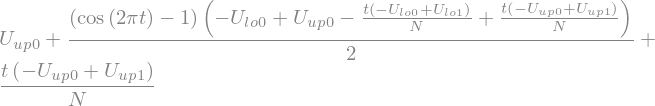

In [14]:
u_t_cyc = U_up_t + (U_up_t - U_lo_t) * (sp.cos((t)/T) - 1)/2
u_t_cyc

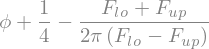

In [15]:
T_1 = T_0 + sp.Rational(1,4) + phi
T_1

The initial linear branch is assumed linear up to the point $T_1$, reaching the value
$U_\mathrm{up,0}$

In [16]:
u_t_lin = U_up0 / T_1 * t

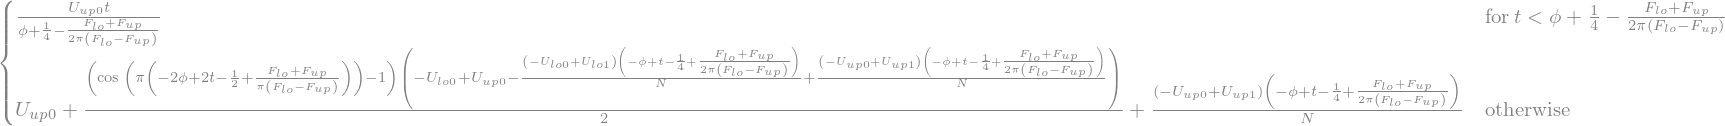

In [17]:
u_t = sp.Piecewise(
    (u_t_lin, t < T_1),
    (u_t_cyc.subs(t, t-(T_1)), True)
)
u_t

In [18]:
get_u_t = sp.lambdify((t, F_up, F_lo, U_up0, U_up1, U_lo0, U_lo1, N, phi), u_t)
get_du_t = sp.lambdify((t, F_up, F_lo, U_up0, U_up1, U_lo0, U_lo1, N, phi), u_t.diff(t))
get_T_1 = sp.lambdify((F_up, F_lo, phi), T_1)

In [19]:
_, ax = plt.subplots(1,1)
t_range = np.linspace(0,10,1000)
T_1_ = get_T_1(3,0,0.1)
ax.plot([T_1_],get_F_t(T_1_,3,0),marker='o')
ax.plot([T_0_],get_F_t(T_0_,3,0),marker='o')
ax.plot(t_range, get_F_t(t_range,3,0))
ax.plot(t_range, get_u_t(t_range,3,0,1,2,0.5,0.8,10,0.1))
ax.plot(t_range, get_du_t(t_range,3,0,1,2,0.5,0.8,10,0.1))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [20]:
from scipy.integrate import cumtrapz
D_range = cumtrapz( get_F_t(t_range,3,0)*get_du_t(t_range,3,0,1,2,0.25,1,10,0.1), 
                   t_range, initial=0)

In [21]:
_, (ax) = plt.subplots(1,1)
t_range = np.linspace(0,10,1000)
ax.plot(get_u_t(t_range,3,0,1,2,0.25,1,10,0.1), get_F_t(t_range,3,0))
ax2 = ax.twinx()
ax2.plot(get_u_t(t_range,3,0,1,2,0.25,1,10,0.1), D_range, color='magenta');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
_, ax = plt.subplots(1,1)
ax.plot(t_range, get_F_t(t_range,3,0.5))
ax.plot(t_range, get_u_t(t_range,3,0.5,1,2,0.5,0.8,10,1))
ax.plot(t_range, D_range, color='magenta')
ax.plot(t_range, get_du_t(t_range,3,0.5,1,2,0.5,0.8,10,1), color='green');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Interactive energy evaluator

In [44]:
import bmcs_utils.api as bu

Gather the above defined symbols and expressions for $F(t)$, $u(t)$ in a subclass of `SymbExpr`.

In [45]:
class EnergyEvaluatorSymb(bu.SymbExpr):
    t, F_up, F_lo, U_up0, U_up1, U_lo0, U_lo1, N, phi = \
        t, F_up, F_lo, U_up0, U_up1, U_lo0, U_lo1, N, phi
    F_t, u_t, du_t = F_t, u_t, u_t.diff(t)
    symb_model_params = ('F_up', 'F_lo', 'U_up0', 'U_up1', 'U_lo0', 'U_lo1', 'N', 'phi')
    symb_expressions = [
        ('F_t', ('t',)),
        ('u_t', ('t',)),
        ('du_t', ('t',)),
    ]

Inject the symbolic expressions in an interactive model, define an interactive view layout and the plot functions 

In [56]:
class EnergyEvaluator(bu.InteractiveModel, bu.InjectSymbExpr):
    name = 'Energy evaluator'
    symb_class = EnergyEvaluatorSymb
    F_up = bu.Float(3)
    F_lo = bu.Float(0)
    U_up0 = bu.Float(2)
    U_up1 = bu.Float(3)
    U_lo0 = bu.Float(1)
    U_lo1 = bu.Float(2)
    N = bu.Float(5)
    phi = bu.Float(0.1)
    ipw_view = bu.View(
        bu.Item('F_up'),
        bu.Item('F_lo'),
        bu.Item('U_up0'),
        bu.Item('U_up1'),
        bu.Item('U_lo0'),
        bu.Item('U_lo1'),
        bu.Item('N'),
        bu.Item('phi')
    )

    def get_W_t(self, trange):
        F_t = self.symb.get_F_t(t_range)
        du_t = self.symb.get_du_t(t_range)
        return cumtrapz( F_t*du_t, t_range, initial=0)

    def subplots(self, fig):
        return fig.subplots(1,2)

    def plot_F_u(self, ax, ax11, t_range):
        u_t = self.symb.get_u_t(t_range)
        F_t = self.symb.get_F_t(t_range)
        ax.plot(u_t, F_t)
        W_t = self.get_W_t(t_range)
        ax11.plot(u_t, W_t, color='magenta')
        
    def plot_Fu_t(self, ax, ax22, t_range):
        u_t = self.symb.get_u_t(t_range)
        F_t = self.symb.get_F_t(t_range)
        ax.plot(t_range, F_t, color='blue')
        ax.plot(t_range, u_t, color='orange')
        W_t = self.get_W_t(t_range)
        ax22.plot(t_range, W_t, color='magenta')
#        ax.plot(t_range, get_du_t(t_range,3,0.5,1,2,0.5,0.8,10,1), color='green');

    def update_plot(self, axes):
        ax1, ax2 = axes
        t_range = np.linspace(0,10,1000)
        ax11 = ax1.twinx()
        self.plot_F_u(ax1, ax11, t_range)
        ax21 = ax2.twinx()
        self.plot_Fu_t(ax2, ax21, t_range)

In [57]:
ee = EnergyEvaluator()
ee.interact()

# Identify the intersection of unloading and reloading branch

Split the data into two-scale resolution t = $n + \theta$, where $n \in 1 \ldots (N-1)$ and $\theta \in (0,1)$. By substituting for $t$ in the above equations it is possible to specify the condition
\begin{align}
 F(t+\theta) &= F(t+1-\zeta) \\
 u(t+\theta) &= u(t+1-\zeta)
\end{align}

In [62]:
theta, zeta = sp.symbols(r'\theta, \zeta')

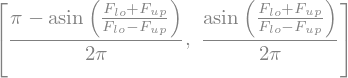

In [66]:
sp.solve(F_t_cyc, t)

# Verify the rate integral using a circle

In [89]:
r = sp.symbols('r')
F_t = r*sp.cos(t/T)
u_t = r*sp.sin(t/T)

In [90]:
get_F_t = sp.lambdify((t,r), F_t)
get_u_t = sp.lambdify((t,r), u_t)

In [91]:
t_range = np.linspace(0,1,100)
_, ax = plt.subplots(1,1)
ax.plot(get_u_t(t_range,2), get_F_t(t_range,2))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [35]:
sp.simplify(F_t*u_t.diff(t))

In [36]:
sp.integrate(F_t*u_t.diff(t),(t,0,1))